In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    accuracy_score,
    silhouette_score,
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
    median_absolute_error,
    r2_score,
    max_error,
)
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score,cross_validate, KFold, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import normalize, StandardScaler, LabelEncoder
from sklearn import tree
from sklearn.impute import SimpleImputer
import pickle

workspace_directory = r'C:\Users\trygg\Documents\Master_project'  # HOME
# workspace_directory = r"C:\Users\tryggvisi\Documents\my-awesome-masters-project"  # WORK
# Change the current working directory to the specified workspace
os.chdir(workspace_directory)
import sklearn
import re

# Create table and import all dataframes

In [21]:
pickleDir = r"Scripts\Python\data_analysis\results_fermented_pickle"

def load_and_process_pickle(pickle_number, pickle_name):

    # pickle_name = "modelling_results_10_times_constant_hyperparams.pkl"
    pickleDir = r"Scripts\Python\data_analysis\results_fermented_pickle"
    path_to_pickle = os.path.join(pickleDir, pickle_name)

    with open(path_to_pickle, 'rb') as file:

        loaded_model = pickle.load(file)

    df = pd.DataFrame(loaded_model[pickle_number]).T

    # df.drop(columns=['y_prediction', 'y_test', 'rsd_at_y_pred', 'feature_imp', 'columns', 'best_params', 'comment', 'key'], inplace=True)

    new_order = ['100SAR', '500SAR', '1000SAR', '100terrain', '500terrain', '1000terrain', '100era5_land',
                 '500era5_land', '1000era5_land']  # New order of rows, you can adjust this list as needed


    # # Reindex the DataFrame with the new order
    # dataframes = [df0, df1, df2, df3, df4, df5,
    #           df6, df7, df8, df9]
    df = df.reindex(new_order)

    return df

def combined_df(pickle_name):
    df0 = load_and_process_pickle(0, pickle_name)
    df1 = load_and_process_pickle(1, pickle_name)
    df2 = load_and_process_pickle(2, pickle_name)
    df3 = load_and_process_pickle(3, pickle_name)
    df4 = load_and_process_pickle(4, pickle_name)
    df5 = load_and_process_pickle(5, pickle_name)
    df6 = load_and_process_pickle(6, pickle_name)
    df7 = load_and_process_pickle(7, pickle_name)
    df8 = load_and_process_pickle(8, pickle_name)
    df9 = load_and_process_pickle(9, pickle_name)
    return df0, df1, df2, df3, df4, df5, df6, df7, df8, df9

pickle_name_OG = "modelling_results_10_times_constant_hyperparams.pkl"
pickle_name_SD = "modelling_results_10_times_constant_hyperparams_with_SD.pkl"
pickle_name_bara_terrain_500 = "modelling_results_10_times_constant_hyperparams_Terrain_500m.pkl"
# # pickle_name = "modelling_results_10_times_constant_hyperparams_Terrain_1000m.pkl"


pickle_name_Era5_1000 = "modelling_results_10_times_constant_hyperparams_Terrain_1000m_alsoERA.pkl" 
pickle_name_Era5_1000_30p = "modelling_results_10_times_constant_hyperparams_Terrain_1000m_alsoERA_30percentdata.pkl" 
pickle_name_Era5_1000_30p_md4 = "modelling_results_10_times_constant_hyperparams_Terrain_1000m_alsoERA_35percentdata_depth6.pkl"

pickle_name_era5_1000_depth8 = "modelling_results_10_times_constant_hyperparams_Terrain_1000m_alsoERA_depth8.pkl" 
pickle_name_era5_1000_depth8_21 = "modelling_results_10_times_constant_hyperparams_Terrain_1000m_alsoERA_depth8_21times.pkl"

pickle_name_era5_1000_depth8_t100 = "modelling_results_10_times_constant_hyperparams_Terrain_100m_alsoERA_depth8_.pkl" 
dataframe_era5_1000_depth8_t100 = combined_df(pickle_name_era5_1000_depth8_t100)
pickle_name_era5_1000_depth8_LESSAR = "modelling_results_10_times_constant_hyperparams_Terrain_1000m_alsoERA_depth8_LESSAR.pkl"
dataframe_era5_1000_depth8_LESSAR = combined_df(pickle_name_era5_1000_depth8_LESSAR)

pickle_name_era5_500 = "modelling_results_10_times_constant_hyperparams_Terrain_ERA5_500m.pkl"
pickle_name_SD_filtered  = "modelling_results_10_times_SD_filter.pkl" 
pickle_name_SD_filter2   = "modelling_results_10_times_SD_filter_100to200std300.pkl" 

pickle_name_LULC = "modelling_results_10_times_withLULC_all.pkl" 
pickle_name_LULC_HOT = "modelling_results_10_times_withLULC_all_hot.pkl" 
dataframe_LULC = combined_df(pickle_name_LULC)
dataframe_LULC_HOT = combined_df(pickle_name_LULC_HOT)

pickle_name_over100 = "modelling_results_10_depth8_over100cm.pkl"
dataframe_over100 = combined_df(pickle_name_over100)
pickle_name_under_100 = "modelling_results_10_depth8_less100cm.pkl"
dataframe_under100 = combined_df(pickle_name_under_100)




# pickle_name_XGB = "modelling_results_10_XGB.pkl" 
# pickle_name_XGB_new = "modelling_results_10_XGB_new.pkl"
# pickle_name_XGB_new2 = "modelling_results_10_XGB_new_new.pkl"
# dataframe_XGB = combined_df(pickle_name_XGB)
# dataframe_XGB_new = combined_df(pickle_name_XGB_new)
# dadataframe_XGB_new_new = combined_df(pickle_name_XGB_new2)

# dataframe_OG = combined_df(pickle_name_OG)
# dataframe_era5_100 = combined_df(pickle_name_SD)
# dataframe_era5_500 = combined_df(pickle_name_era5_500)

dataframe_era5_1000 = combined_df(pickle_name_Era5_1000)
dataframe_era5_1000_depth8 = combined_df(pickle_name_era5_1000_depth8)
dataframe_era5_1000_depth8_21 = combined_df(pickle_name_era5_1000_depth8_21)


# dataframe_era5_1000_30p = combined_df(pickle_name_Era5_1000_30p)
# dataframe_era5_1000_30p_md4 = combined_df(pickle_name_Era5_1000_30p_md4)


# dataframe_terrain_500 = combined_df(pickle_name_bara_terrain_500)
# dataframe_SD_filtered = combined_df(pickle_name_SD_filtered)
# dataframe_SD_filtered2 = combined_df(pickle_name_SD_filter2)


pickle_name = pickle_name_era5_1000_depth8
df0 = load_and_process_pickle(0, pickle_name)
df1 = load_and_process_pickle(1, pickle_name)
df2 = load_and_process_pickle(2, pickle_name)
df3 = load_and_process_pickle(3, pickle_name)
df4 = load_and_process_pickle(4, pickle_name)
df5 = load_and_process_pickle(5, pickle_name)
df6 = load_and_process_pickle(6, pickle_name)
df7 = load_and_process_pickle(7, pickle_name)
df8 = load_and_process_pickle(8, pickle_name)
df9 = load_and_process_pickle(9, pickle_name)

In [11]:
# fyrir 21
def load_and_process_pickle(pickle_number, pickle_name):
    pickleDir = r"Scripts\Python\data_analysis\results_fermented_pickle"
    path_to_pickle = os.path.join(pickleDir, pickle_name)
    with open(path_to_pickle, 'rb') as file:
        loaded_model = pickle.load(file)
    df = pd.DataFrame(loaded_model[pickle_number]).T
    # df.drop(columns=['y_prediction', 'y_test', 'rsd_at_y_pred', 'feature_imp', 'columns', 'best_params', 'comment', 'key'], inplace=True)

    new_order = ['100SAR', '500SAR', '1000SAR', '100terrain', '500terrain', '1000terrain', '100era5_land',
                 '500era5_land', '1000era5_land']  # New order of rows, you can adjust this list as needed
    df = df.reindex(new_order)
    return df

def combined_df(pickle_name):
    df0 = load_and_process_pickle(0, pickle_name)
    df1 = load_and_process_pickle(1, pickle_name)
    df2 = load_and_process_pickle(2, pickle_name)
    df3 = load_and_process_pickle(3, pickle_name)
    df4 = load_and_process_pickle(4, pickle_name)
    df5 = load_and_process_pickle(5, pickle_name)
    df6 = load_and_process_pickle(6, pickle_name)
    df7 = load_and_process_pickle(7, pickle_name)
    df8 = load_and_process_pickle(8, pickle_name)
    df9 = load_and_process_pickle(9, pickle_name)
    df10 = load_and_process_pickle(10, pickle_name)
    df11 = load_and_process_pickle(11, pickle_name)
    df12 = load_and_process_pickle(12, pickle_name)
    df13 = load_and_process_pickle(13, pickle_name)
    df14 = load_and_process_pickle(14, pickle_name)
    df15 = load_and_process_pickle(15, pickle_name)
    df16 = load_and_process_pickle(16, pickle_name)
    df17 = load_and_process_pickle(17, pickle_name)
    df18 = load_and_process_pickle(18, pickle_name)
    df19 = load_and_process_pickle(19, pickle_name)
    df20 = load_and_process_pickle(20, pickle_name)
    return df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20

pickle_name_era5_1000_depth8_21 = "modelling_results_10_times_constant_hyperparams_Terrain_1000m_alsoERA_depth8_21times.pkl"

dataframe_era5_1000_depth8_21 = combined_df(pickle_name_era5_1000_depth8_21)

pickle_name = pickle_name_era5_1000_depth8_21
df0 = load_and_process_pickle(0, pickle_name)
df1 = load_and_process_pickle(1, pickle_name)
df2 = load_and_process_pickle(2, pickle_name)
df3 = load_and_process_pickle(3, pickle_name)
df4 = load_and_process_pickle(4, pickle_name)
df5 = load_and_process_pickle(5, pickle_name)
df6 = load_and_process_pickle(6, pickle_name)
df7 = load_and_process_pickle(7, pickle_name)
df8 = load_and_process_pickle(8, pickle_name)
df9 = load_and_process_pickle(9, pickle_name)
df10 = load_and_process_pickle(10, pickle_name)
df11 = load_and_process_pickle(11, pickle_name)
df12 = load_and_process_pickle(12, pickle_name)
df13 = load_and_process_pickle(13, pickle_name)
df14 = load_and_process_pickle(14, pickle_name)
df15 = load_and_process_pickle(15, pickle_name)
df16 = load_and_process_pickle(16, pickle_name)
df17 = load_and_process_pickle(17, pickle_name)
df18 = load_and_process_pickle(18, pickle_name)
df19 = load_and_process_pickle(19, pickle_name)
df20 = load_and_process_pickle(20, pickle_name)

In [7]:
# #for counting the best hyperparameters, already finished
# import pandas as pd
# from collections import Counter

# # Assuming df1, df2, df3, df4, df5 are already defined

# # Combine all the best_params dictionaries from all DataFrames
# best_params_list = []
# for df in [df1, df2, df3, df4, df5]:
#     best_params_list.extend(df['r2'].tolist())

# # Initialize counters for each key
# max_depth_counter = Counter()
# max_features_counter = Counter()
# n_features_counter = Counter()

# # Count the occurrences of each value for each key
# for params in best_params_list:
#     max_depth_counter[params['max_depth']] += 1
#     max_features_counter[params['max_features']] += 1
#     n_features_counter[params['n_estimators']] += 1

# # Find the most common value for each key
# most_common_max_depth = max_depth_counter.most_common(1)[0]
# most_common_max_features = max_features_counter.most_common(1)[0]
# most_common_n_features = n_features_counter.most_common(1)[0]

# print(f"Most common max_depth: {most_common_max_depth}")
# print(f"Most common max_features: {most_common_max_features}")
# print(f"Most common n_features: {most_common_n_features}")


In [4]:
#Calculate median stats for DFs based on RMSE
def process_dataframes_median(dataframe_combined):
    # Step 1: Extract the 'rmse' columns from each dataframe and combine them into a single dataframe
    rmse_values = pd.concat([df[['rmse_mean']].rename(
        columns={'rmse_mean': f'df{i}'}) for i, df in enumerate(dataframe_combined)], axis=1)

    # Step 2: Calculate the max RMSE value for each row
    rmse_maxes = rmse_values.median(axis=1)

    # Step 3: Find out which dataframe has the max RMSE value for each row
    max_sources = rmse_values.eq(rmse_maxes, axis=0).idxmax(axis=1)

    # Step 4: Select the rows from the dataframes that contain the max RMSE
    result_rows = []
    source_df_names = []
    for idx, source in enumerate(max_sources):
        df_index = int(source[2:])
        result_rows.append(dataframe_combined[df_index].iloc[idx])
        source_df_names.append(source)

    # Combine the selected rows into a single dataframe
    result_df = pd.DataFrame(result_rows)
    result_df['Source_DF'] = source_df_names

    # Drop the unnecessary columns
    try:
        result_df_dropped = result_df.drop(columns=[
            'columns', 'feature_imp', 'best_params', 'comment', 
            'y_prediction', 'y_test', 'rsd_at_y_pred', 
            'random_state',
            'mae_mean', 'mse_mean', 'rmse_mean', 'r2_mean',
            'best_rfr'
        ])
    except:
                result_df_dropped = result_df.drop(columns=[
            'columns', 'feature_imp', 'best_params', 'comment', 
            'y_prediction', 'y_test', 'rsd_at_y_pred', 
            'random_state',
            'mae_mean', 'mse_mean', 'rmse_mean', 'r2_mean',
            # 'best_rfr'
        ])

    # Print the resulting dataframe as a table
    print(result_df_dropped.to_markdown())
    return result_df


In [10]:
#Calculate max stats for DFs based on RMSE
def process_dataframes_max(dataframe_combined):
    # Step 1: Extract the 'rmse' columns from each dataframe and combine them into a single dataframe
    rmse_values = pd.concat([df[['rmse_mean']].rename(
        columns={'rmse_mean': f'df{i}'}) for i, df in enumerate(dataframe_combined)], axis=1)

    # Step 2: Calculate the max RMSE value for each row
    rmse_maxes = rmse_values.max(axis=1)

    # Step 3: Find out which dataframe has the max RMSE value for each row
    max_sources = rmse_values.eq(rmse_maxes, axis=0).idxmax(axis=1)

    # Step 4: Select the rows from the dataframes that contain the max RMSE
    result_rows = []
    source_df_names = []
    for idx, source in enumerate(max_sources):
        df_index = int(source[2:])
        result_rows.append(dataframe_combined[df_index].iloc[idx])
        source_df_names.append(source)

    # Combine the selected rows into a single dataframe
    result_df = pd.DataFrame(result_rows)
    result_df['Source_DF'] = source_df_names

    # Drop the unnecessary columns
    try:
        result_df_dropped = result_df.drop(columns=[
            'columns', 'feature_imp', 'best_params', 'comment', 
            'y_prediction', 'y_test', 'rsd_at_y_pred', 
            'random_state',
            'mae_mean', 'mse_mean', 'rmse_mean', 'r2_mean',
            'best_rfr'
        ])
    except:
                result_df_dropped = result_df.drop(columns=[
            'columns', 'feature_imp', 'best_params', 'comment', 
            'y_prediction', 'y_test', 'rsd_at_y_pred', 
            'random_state',
            'mae_mean', 'mse_mean', 'rmse_mean', 'r2_mean',
            # 'best_rfr'
        ])

    # Print the resulting dataframe as a table
    print(result_df_dropped.to_markdown())
    return result_df


In [6]:
# Calculate mean stats for 10 dfs
def calculate_model_performance(dataframe):
    # Specify the columns of interest
    columns_of_interest = ['mae_mean', 'rmse_mean','r2_mean', 
                        #    'mae', 'rmse', 'r2',
                           ]

    # Initialize an empty list to store the selected columns from each DataFrame
    selected_columns_list = []

    # Iterate through each DataFrame and select the columns of interest
    for df in dataframe:
        selected_columns = df[columns_of_interest].round(0)
        selected_columns_list.append(selected_columns)

    # Concatenate the selected columns horizontally, preserving the index
    combined_df = pd.concat(selected_columns_list, axis=1, keys=[
                            f'df{i}' for i in range(len(dataframe))])

    # Calculate the mean for each row across the DataFrames
    row_means = combined_df.T.groupby(level=1).mean().T
    row_means = row_means.astype(float).round(2)

    # Print the resulting dataframe as a table
    print(row_means.to_markdown())
    # return row_means
    return row_means

In [13]:
len(dataframe_era5_1000_depth8)

10

In [22]:
print('the max stats based on RMSE!')

print('OG')
process_dataframes_max(dataframe_era5_1000_depth8)
print('over 100 cm')
process_dataframes_max(dataframe_over100)
print('under 100')
process_dataframes_max(dataframe_under100)
# print('OG')
result_df = process_dataframes_max(dataframe_over100)
# result_df = process_dataframes(dataframe_era5_100)
# process_dataframes(dataframe_OG)
# result_df.to_excel(r"C:\Users\trygg\Documents\Master_project\Annað\Thesis figures\Results\best_models_SD_1000mTerr.xlsx")

the max stats based on RMSE!
OG
|               |     mae |     mse |    rmse |        r2 |       me | Source_DF   |
|:--------------|--------:|--------:|--------:|----------:|---------:|:------------|
| 100SAR        | 36.3107 | 2048.98 | 45.2656 | 0.0515753 | 3.44202  | df5         |
| 500SAR        | 35.8223 | 2086.05 | 45.6733 | 0.0401505 | 3.24957  | df8         |
| 1000SAR       | 37.4559 | 2222.24 | 47.1407 | 0.0317632 | 1.72146  | df5         |
| 100terrain    | 30.9052 | 1681.32 | 41.0038 | 0.221757  | 0.370543 | df2         |
| 500terrain    | 31.5708 | 1606.04 | 40.0754 | 0.261016  | 6.06441  | df0         |
| 1000terrain   | 31.5496 | 1602.42 | 40.0303 | 0.30182   | 0.523756 | df8         |
| 100era5_land  | 27.7516 | 1328.52 | 36.4489 | 0.39885   | 0.321037 | df6         |
| 500era5_land  | 29.0407 | 1413.64 | 37.5984 | 0.349543  | 5.72689  | df4         |
| 1000era5_land | 28.4591 | 1382.37 | 37.1802 | 0.397699  | 1.63646  | df5         |
over 100 cm
|               |    

In [ ]:
table = process_dataframes(dataframe_era5_1000_depth8)
#export to excel
table.to_excel(r"C:\Users\trygg\Documents\Master_project\Annað\Thesis figures\Results\best_performance_of_models_SD_1000mTerr_8maxd.xlsx")
table = calculate_model_performance(dataframe_era5_1000_depth8)
#export to excel
table.to_excel(r"C:\Users\trygg\Documents\Master_project\Annað\Thesis figures\Results\mean_performance_of_models_SD_1000mTerr_8maxd.xlsx")

In [25]:
print('Bera saman og og filtered')
print('OG')
row_og = calculate_model_performance(dataframe_era5_1000_depth8)
# print('30')
# calculate_model_performance(dataframe_era5_1000_30p)
print('over 100 cm')
row_over = calculate_model_performance(dataframe_over100)
print('under 100')
row_under = calculate_model_performance(dataframe_under100)
# print('Filtered2')
# calculate_model_performance(dataframe_SD_filtered2)

Bera saman og og filtered
OG
|               |   mae_mean |   r2_mean |   rmse_mean |
|:--------------|-----------:|----------:|------------:|
| 100SAR        |      37.95 |     -0.01 |       48.51 |
| 500SAR        |      38.97 |     -0.04 |       49.21 |
| 1000SAR       |      38.78 |     -0.04 |       48.92 |
| 100terrain    |      34.43 |      0.16 |       44.23 |
| 500terrain    |      34.35 |      0.15 |       44.31 |
| 1000terrain   |      33.66 |      0.17 |       43.46 |
| 100era5_land  |      31.72 |      0.26 |       41.3  |
| 500era5_land  |      31.35 |      0.26 |       41.27 |
| 1000era5_land |      31.12 |      0.27 |       40.81 |
over 100 cm
|               |   mae_mean |   r2_mean |   rmse_mean |
|:--------------|-----------:|----------:|------------:|
| 100SAR        |      29.85 |     -0.14 |       37.96 |
| 500SAR        |      30.15 |     -0.19 |       38.84 |
| 1000SAR       |      29.02 |     -0.14 |       37.23 |
| 100terrain    |      28.6  |     -0.06 |     

In [27]:
row_under

,mae_mean,r2_mean,rmse_mean
100SAR,19.47,-0.15,23.43
500SAR,19.64,-0.15,23.74
1000SAR,19.63,-0.11,23.69
100terrain,17.05,0.07,20.89
500terrain,17.17,0.08,21.19
1000terrain,17.04,0.13,20.94
100era5_land,16.54,0.13,20.28
500era5_land,16.56,0.16,20.25
1000era5_land,16.21,0.22,19.81


In [28]:
# calclulate the perfcent difference between row_og and row_new
percent_diff = (row_og -row_new) / row_new * 100
percent_diff

,mae_mean,r2_mean,rmse_mean
100SAR,-0.236593,-50.000000,-0.471892
500SAR,-1.516300,-50.000000,-1.835228
1000SAR,-1.147081,-55.555556,-2.042451
100terrain,3.611195,-11.111111,1.328751
500terrain,3.215144,-11.764706,0.842057
1000terrain,2.310030,0.000000,0.276880
100era5_land,8.704592,-21.212121,4.556962
500era5_land,6.487772,-13.333333,2.280050
1000era5_land,7.384403,-12.903226,2.873708


In [ ]:
import numpy as np
import pandas as pd

def column_stats(dataframe, column_name):
    """
    Calculate various statistics for each NumPy array within a column in a DataFrame.

    Args:
    dataframe (pd.DataFrame): The DataFrame containing the column.
    column_name (str): The name of the column for which statistics are calculated.

    Returns:
    dict: A dictionary containing various statistics for each array in the column, including mean, standard deviation, minimum, maximum, and median.
    """
    column_arrays = dataframe[column_name]
    stats = {}
    for i, arr in enumerate(column_arrays):
        column = np.array(arr)
        stats[f'{i}'] = {
            'mean': np.round(np.mean(column), 2),
            'std': np.round(np.std(column), 2),
            'min': np.round(np.min(column), 2),
            'max': np.round(np.max(column), 2),
            'median': np.round(np.median(column), 2)
        }
    return stats

# print(column_stats(result_df, 'rsd_at_y_pred'))
print(column_stats(result_df, 'y_prediction'))
print(column_stats(result_df, 'y_test'))

# Feature value bar plot

In [12]:
 #convert to np array
#find the mean of the feature importance for each row of the 10 dataframes
def convert_to_np_array(position):
    """
    Convert the 'feature_imp' values from multiple dataframes into a numpy array and calculate the mean.

    Args:
        position (int): The position of the desired row in the dataframes.

    Returns:
        numpy.ndarray: The mean of the 'feature_imp' values from the specified position in each dataframe, multiplied by 100.
    """
    feature_imp0 = np.array(df0.iloc[position]['feature_imp'])
    feature_imp1 = np.array(df1.iloc[position]['feature_imp'])
    feature_imp2 = np.array(df2.iloc[position]['feature_imp'])
    feature_imp3 = np.array(df3.iloc[position]['feature_imp'])
    feature_imp4 = np.array(df4.iloc[position]['feature_imp'])
    feature_imp5 = np.array(df5.iloc[position]['feature_imp'])
    feature_imp6 = np.array(df6.iloc[position]['feature_imp'])
    feature_imp7 = np.array(df7.iloc[position]['feature_imp'])
    feature_imp8 = np.array(df8.iloc[position]['feature_imp'])
    feature_imp9 = np.array(df9.iloc[position]['feature_imp'])
    
    feature_imp_mean = (feature_imp0 + feature_imp1 + feature_imp2 + feature_imp3 + feature_imp4 + feature_imp5 + feature_imp6 + feature_imp7 + feature_imp8 + feature_imp9)/10
    
    return feature_imp_mean * 100

indexlist = list(df0.index)
df_feature_imp = pd.DataFrame(columns = ['feature_imp'])
for i in range(len(indexlist)):
    df_feature_imp.loc[i, 'feature_imp'] = convert_to_np_array(i)
df_feature_imp    

,feature_imp
0,"[20.0544315022384, 20.414643302800496, 20.0001..."
1,"[20.608612945736443, 20.8584609303885, 19.6228..."
2,"[20.60036001825915, 20.598868216319037, 19.720..."
3,"[9.188759316395581, 10.488689095692875, 8.7647..."
4,"[9.378787993456347, 10.49577486595652, 8.49748..."
5,"[8.821255706842498, 9.881014407615623, 8.24111..."
6,"[6.807197584754937, 7.5399360276542104, 5.6890..."
7,"[6.72327723798877, 7.3276233111087175, 5.33188..."
8,"[6.468546849470595, 6.845413530923946, 5.40802..."


In [13]:
print(df_feature_imp.loc[0, 'feature_imp'])
print(df_feature_imp.loc[1, 'feature_imp'])
print(df_feature_imp.loc[2, 'feature_imp'])
print(df_feature_imp.loc[3, 'feature_imp'])
print(df_feature_imp.loc[4, 'feature_imp'])
print(df_feature_imp.loc[5, 'feature_imp'])
print(df_feature_imp.loc[6, 'feature_imp'])
print(df_feature_imp.loc[7, 'feature_imp'])
print(df_feature_imp.loc[8, 'feature_imp'])

[20.0544315  20.4146433  20.00010228 21.57014059 15.06159408  2.89908824]
[20.60861295 20.85846093 19.62282787 21.11719772 15.44440722  2.34849331]
[20.60036002 20.59886822 19.72069003 21.46685953 15.23990386  2.37331835]
[ 9.18875932 10.4886891   8.76470722  9.55269918  9.1585182   1.52775189
 10.92053479 11.17165392 11.31636703  8.22705668  9.68326267]
[ 9.37878799 10.49577487  8.4974883   8.91861295  8.49672273  1.34511449
 10.98475434 12.23586202 11.16719832  8.79554552  9.68413846]
[ 8.82125571  9.88101441  8.24111705  8.78577554  8.10896903  1.36427735
 10.86987684 13.58916874 11.20237475  9.04132772 10.09484287]
[ 6.80719758  7.53993603  5.68907052  7.23513551  4.48173126  0.71936099
  7.06788299  9.18652254  9.0136268   4.82273299  7.42703194  8.93383935
 10.81581517 10.26011633]
[ 6.72327724  7.32762331  5.33188665  6.06361859  3.9352903   0.57991714
  7.20444075 10.39898394  9.24222409  5.82484299  7.16533667  9.23474858
 11.32845533  9.63935442]
[ 6.46854685  6.84541353  5.4

In [15]:
# Assuming your dataframe is named df and has the column 'feature_imp'
# Create the lists for the specific index ranges
models_SAR = df_feature_imp.loc[0:2, 'feature_imp'].tolist()
models_terrain = df_feature_imp.loc[3:5, 'feature_imp'].tolist()
models_era5 = df_feature_imp.loc[6:8, 'feature_imp'].tolist()

def create_2d_array_from_lists(lists):
    # Create a 2D numpy array from the given list of lists
    num_rows = len(lists)
    num_cols = len(lists[0])  # Assuming all sublists have the same length

    # Create a 2D array filled with zeros
    result_array = np.zeros((num_rows, num_cols))

    # Populate the array with values from the lists
    for i, sublist in enumerate(lists):
        result_array[i, :] = sublist

    return result_array

# Create 2D arrays for each list
result_array_SAR = create_2d_array_from_lists(models_SAR)
result_array_models_terrain = create_2d_array_from_lists(models_terrain)
result_array_models_era5 = create_2d_array_from_lists(models_era5)

columns_SAR = ['VH', 'VV', 'VH/VV', 'Incidence Angle', 'Time Diff', 'Orbit direction']
columns_DEM = ['Elevation', 'Aspect', 'Slope', 'TPI', 'TRI']
columns_ERA = ['SKT', 'RSN','SD']

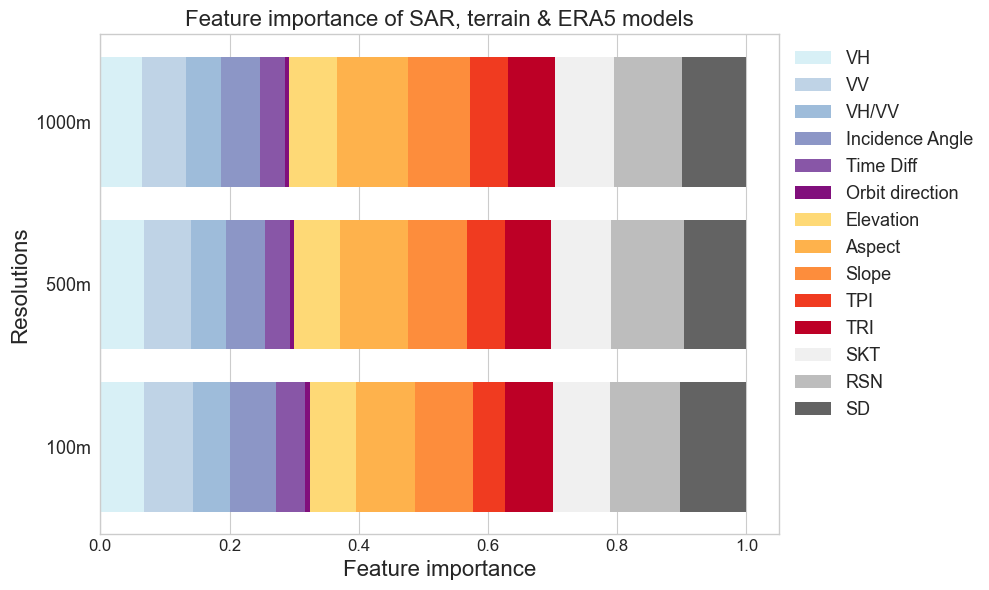

In [16]:

#setup plot
plt.style.use('seaborn-v0_8-whitegrid')
aspect_ratio = 5/3  # You can adjust this ratio as needed
width = 10  # Desired width of the figure in inches
height = width / aspect_ratio

#model categories

# #SAR
# values = result_array_SAR
# categories = (columns_SAR)
# model_group = 'SAR'
# #DEM
# values = result_array_models_terrain
# categories = (columns_SAR + columns_DEM)
# model_group = 'DEM'

# #ERA5
values = result_array_models_era5
categories = (columns_SAR+ columns_DEM+ columns_ERA)
model_group = 'ERA5'

num_categories = len(categories)
total_bars = 3
# Normalize the values so that each row sums up to 100
values /= np.sum(values, axis=1)[:, np.newaxis]

# Define color schemes for different groups of categories
# color_scheme1 = ['#8c510a','#d8b365','#f6e8c3','#c7eae5','#5ab4ac','#01665e']
color_scheme1 = ['#d8f0f6', '#bfd3e6',
                 '#9ebcda', '#8c96c6', '#8856a7', '#810f7c']
# color_scheme2 = ['#d7191c','#fdae61','#ffffbf','#abd9e9','#2c7bb6']  # Repeat for the next group
color_scheme2 = ['#fed976', '#feb24c', '#fd8d3c', '#f03b20', '#bd0026']
color_scheme3 = ['#f0f0f0','#bdbdbd','#636363']  # For the last 3 categories

# color_scheme1.reverse()

# Combine the color schemes
custom_colors = color_scheme1 + color_scheme2 + color_scheme3

# Calculate the positions for the bars
bar_positions = np.arange(total_bars)

# Plotting the bars
plt.figure(figsize=(width, height))
for i in range(num_categories):
    plt.barh(bar_positions, values[:, i], left=np.sum(
        values[:, :i], axis=1), label=categories[i], color=custom_colors[i])

resolutions = [100, 500, 1000]

# Add labels and title
plt.xlabel('Feature importance', fontsize=16)  # Increase font size
plt.ylabel('Resolutions', fontsize=16)  # Increase font size
# plt.title('Feature importance of SAR models', fontsize=16)  # Increase font size
if model_group == 'SAR':
    plt.title('Feature importance of SAR models', fontsize=16)  # Increase font size
elif model_group == 'DEM':
  plt.title('Feature importance of SAR & terrain models', fontsize=16)  # Increase font size
elif model_group == 'ERA5':
  plt.title('Feature importance of SAR, terrain & ERA5 models',fontsize=16)  # Increase font size
  
# Increase tick label font size
plt.yticks(bar_positions, [f'{i}m ' for i in resolutions], fontsize=13)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.60),
           fontsize=13)  # Increase legend font size
plt.xticks(fontsize=12)  # Increase x-axis tick font size
plt.grid(axis='y', alpha=0)  # Add gridlines for the x-axis
# Show the plot
plt.tight_layout()
plt.show()

# Plotting results

Pred vs

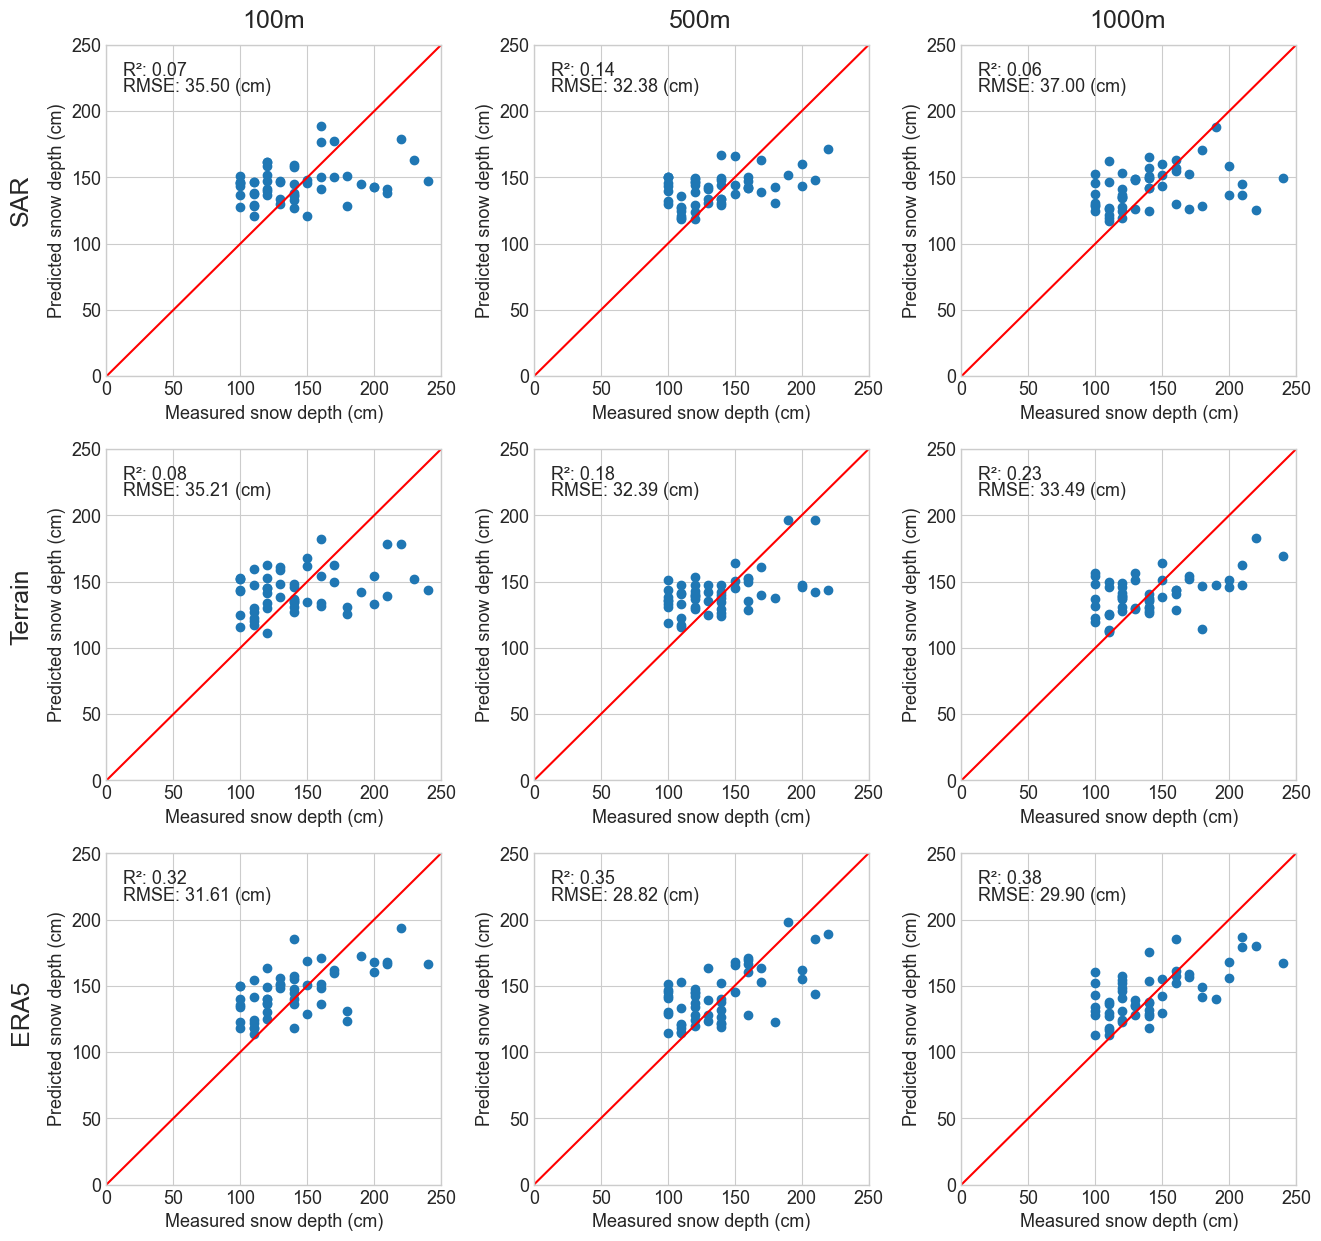

In [17]:
plt.rcParams.update({'font.size': 13})

# Set style
plt.style.use('seaborn-v0_8-whitegrid')

# Create subplots
fig, axs = plt.subplots(3, 3, figsize=(14, 14))

# Define titles for each row and resolutions
column_titles = ['SAR', 'Terrain', 'ERA5']
row_titles = ['100m', '500m', '1000m']

# Plot data from result_df
for i in range(9):
    row = result_df.iloc[i]
    ax = axs[i // 3, i % 3]
    ax.plot(row['y_test'], row['y_prediction'], 'o')
    ax.plot([0, 250], [0, 250], 'r-')
    ax.set_xlabel('Measured snow depth (cm)')
    ax.set_ylabel('Predicted snow depth (cm)')
    ax.set_xlim(0, 250)  # Set x-axis limit to start at 0 and upper limit to 250
    ax.set_ylim(0, 250)  # Set y-axis limit to start at 0 and upper limit to 250
    
    # Add R² and RMSE values
    r2 = row['r2']
    rmse = row['rmse']
    ax.text(0.05, 0.95, f'R²: {r2:.2f}', transform=ax.transAxes, verticalalignment='top')
    ax.text(0.05, 0.90, f'RMSE: {rmse:.2f} (cm)', transform=ax.transAxes, verticalalignment='top')

# Add side titles for resolutions
for i, column_title in enumerate(column_titles):
    fig.text(0.065, 0.80 - (i * 0.29), column_title, va='center', ha='center', rotation='vertical', fontsize=18)

# Add top titles for each column
for i, row_title in enumerate(row_titles):
    fig.text(0.245 + (i * 0.305), 0.928, row_title, va='center', ha='center', fontsize=18)

# Adjust layout
plt.tight_layout(rect=[0.07, 0.05, 1, 0.93])  # Adjust the layout to make room for the side and top titles
plt.show()


# Residuals plot

In [ ]:
plt.rcParams.update({'font.size': 13})

# Set style
plt.style.use('seaborn-v0_8-whitegrid')

# Create subplots
fig, axs = plt.subplots(3, 3, figsize=(14, 14))

# Define titles for each row and resolutions
column_titles = ['SAR', 'Terrain', 'ERA5']
row_titles = ['100m', '500m', '1000m']

# Plot residuals data from result_df
for i in range(9):
    y_pred = np.array(result_df['y_prediction'].iloc[i])
    y_test = np.array(result_df['y_test'].iloc[i])
    residuals = y_test - y_pred
    
    ax = axs[i // 3, i % 3]
    ax.plot(y_test, residuals, 'o')
    ax.axhline(0, color='r', linestyle='-')  # Add a horizontal line at y=0
    ax.set_xlabel('Measured snow depth (cm)')
    ax.set_ylabel('Residuals')
    ax.set_xlim(0, 275)  # Set x-axis limit to start at 0 and upper limit to 250
    ax.set_ylim(-190, 190)  # Set y-axis limit to -250 and 250 for residuals

# Add side titles for resolutions
for i, row_title in enumerate(row_titles):
    fig.text(0.065, 0.80 - (i * 0.29), row_title, va='center', ha='center', rotation='vertical', fontsize=18)

# Add top titles for each column
for i, column_title in enumerate(column_titles):
    fig.text(0.26 + (i * 0.305), 0.928, column_title, va='center', ha='center', fontsize=18)

# Adjust layout
plt.tight_layout(rect=[0.07, 0.05, 1, 0.93])  # Adjust the layout to make room for the side and top titles
plt.show()

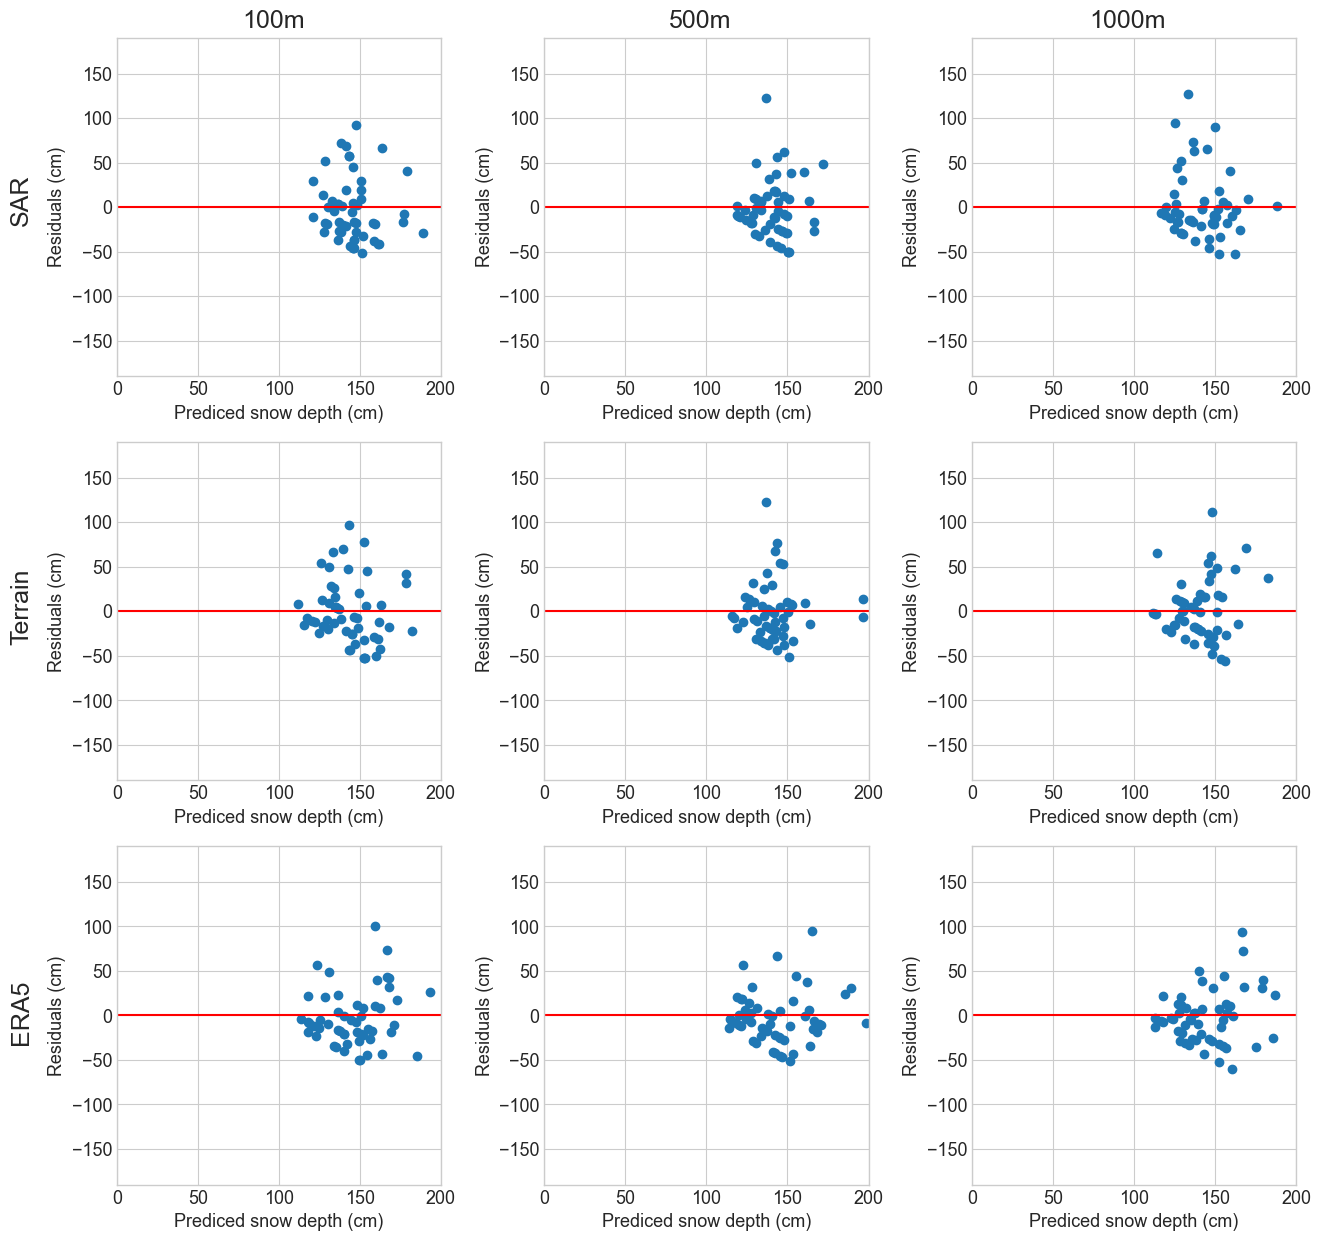

In [19]:
plt.rcParams.update({'font.size': 13})

# Set style
plt.style.use('seaborn-v0_8-whitegrid')

# Create subplots
fig, axs = plt.subplots(3, 3, figsize=(14, 14))

# Define titles for each row and resolutions
column_titles = ['SAR', 'Terrain', 'ERA5']
row_titles = ['100m', '500m', '1000m']

# Plot residuals data from result_df
for i in range(9):
    y_pred = np.array(result_df['y_prediction'].iloc[i])
    y_test = np.array(result_df['y_test'].iloc[i])
    residuals = y_test - y_pred
    
    ax = axs[i // 3, i % 3]
    ax.plot(y_pred, residuals, 'o')
    ax.axhline(0, color='r', linestyle='-')  # Add a horizontal line at y=0
    ax.set_xlabel('Prediced snow depth (cm)')
    ax.set_ylabel('Residuals (cm)')
    ax.set_xlim(0, 200)  # Set x-axis limit to start at 0 and upper limit to 250
    ax.set_ylim(-190, 190)  # Set y-axis limit to -250 and 250 for residuals
    


# Add side titles for resolutions
for i, column_title in enumerate(column_titles):
    fig.text(0.065, 0.80 - (i * 0.29), column_title, va='center', ha='center', rotation='vertical', fontsize=18)

# Add top titles for each column
for i, row_title in enumerate(row_titles):
    fig.text(0.245 + (i * 0.305), 0.928, row_title, va='center', ha='center', fontsize=18)

# Adjust layout
plt.tight_layout(rect=[0.07, 0.05, 1, 0.93])  # Adjust the layout to make room for the side and top titles
plt.show()

# Learning cuerve

In [42]:
# 6. Learning Curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error',
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel('Training Size')
plt.ylabel('MSE')
plt.title('Learning Curve')
plt.legend()
plt.show()

NameError: name 'model' is not defined

In [43]:
# Predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Calculate residuals
train_residuals = y_train - train_pred
test_residuals = y_test - test_pred

# 1. Residual Plot
plt.figure(figsize=(10, 5))
plt.scatter(train_pred, train_residuals, color='blue', alpha=0.5, label='Training Data')
plt.scatter(test_pred, test_residuals, color='red', alpha=0.5, label='Test Data')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Snow Depth')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.legend()
plt.show()

NameError: name 'model' is not defined

# ERA5

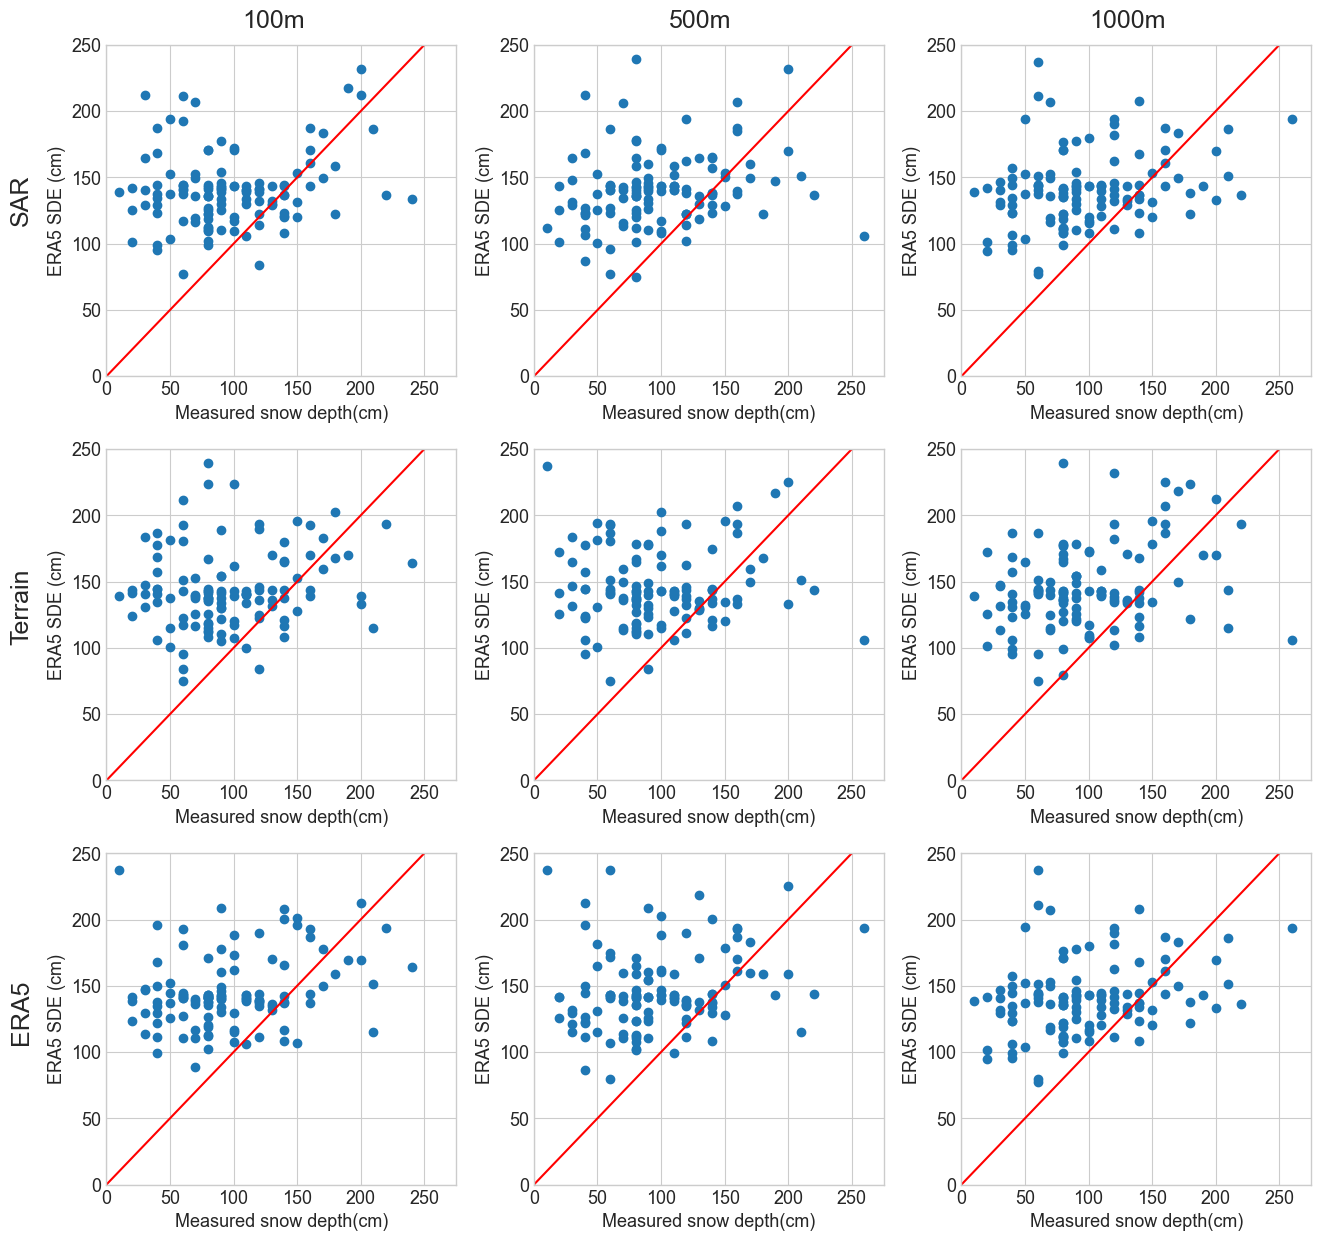

In [78]:
plt.rcParams.update({'font.size': 13})

# Set style
plt.style.use('seaborn-v0_8-whitegrid')

# Create subplots
fig, axs = plt.subplots(3, 3, figsize=(14, 14))

# Define titles for each row and resolutions
column_titles = ['SAR', 'Terrain', 'ERA5']
row_titles = ['100m', '500m', '1000m']

# Plot data from result_df
for i in range(9):
    row = result_df.iloc[i]
    ax = axs[i // 3, i % 3]
    ax.plot(row['y_test'], row['rsd_at_y_pred'], 'o')
    ax.plot([0, 250], [0, 250], 'r-')
    ax.set_xlabel('Measured snow depth(cm)')
    ax.set_ylabel('ERA5 SDE (cm)')
    ax.set_xlim(0, 275)  # Set x-axis limit to start at 0 and upper limit to 250
    ax.set_ylim(0, 250)  # Set y-axis limit to start at 0 and upper limit to 250
    
    mean_pred = np.mean(result_df.iloc[i]['y_prediction'])
    mean_era5 = np.mean(result_df.iloc[i]['rsd_at_y_pred'])
    # ax.text(0.47, 0.20, f'Avg pred: {mean_pred:.1f} cm', transform=ax.transAxes, verticalalignment='top')
    # ax.text(0.47, 0.14, f'Avg ERA5: {mean_era5:.1f} cm', transform=ax.transAxes, verticalalignment='top')

# Add side titles for resolutions
for i, column_title in enumerate(column_titles):
    fig.text(0.065, 0.80 - (i * 0.29), column_title, va='center', ha='center', rotation='vertical', fontsize=18)

# Add top titles for each column
for i, row_title in enumerate(row_titles):
    fig.text(0.245 + (i * 0.305), 0.928, row_title, va='center', ha='center', fontsize=18)


# Adjust layout
plt.tight_layout(rect=[0.07, 0.05, 1, 0.93])  # Adjust the layout to make room for the side and top titles
plt.show()

In [60]:
print(np.mean(result_df.iloc[8]['y_prediction']))
print(np.std(result_df.iloc[8]['y_prediction']))
print(np.mean(result_df.iloc[8]['rsd_at_y_pred']))
print(np.std(result_df.iloc[8]['rsd_at_y_pred']))

98.93153711659762
24.160572269439324
140.40898877049182
27.04520598841387
